# Random Forest Regression for Predicting Student Grades

In this notebook, we are going to use the Random Forest Regression model to predict student grades based on various features, such as socioeconomic score, study hours, sleep hours, and attendance percentage. We will explore the dataset, preprocess the data, build a Random Forest model, and evaluate its performance.

## Prepare Environment

We start by importing the necessary libraries that will be used throughout the analysis.

In [52]:
# Uncomment code cell to install required packages
#!pip install -r requirements.txt

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Load Data
Here, we load the dataset and take a look at the first few rows to understand its structure.

In [54]:
# Load the dataset
df = pd.read_csv('data.csv')

# Displaying the first few rows of the dataset
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


## Data Exploration
Before proceeding with model building, we perform some initial exploration of the dataset, such as checking for missing values and viewing summary statistics.

In [55]:
# Checking for missing values
df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [56]:
# Summary statistics of the dataset
df.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


## Feature Relationships
In this section, we visualize the relationships between different features using a correlation matrix. This helps us understand how each feature correlates with others and with the target variable.

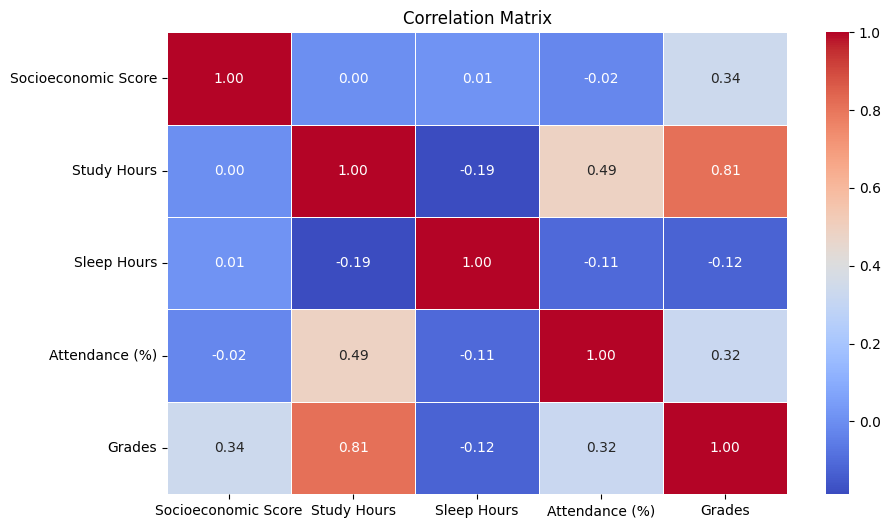

In [57]:
# Correlation matrix to understand feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

## Preprocessing Data
In this section, we separate the features and target variable, and then split the dataset into training and testing sets. We also scale the data to ensure that the model can learn efficiently.

In [58]:
# Separating features (X) and target (y)
X = df.drop(columns=['Grades'])
y = df['Grades']

In [59]:
# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Standardizing the data for better performance (optional for Random Forest, but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building the Model
Now that we have preprocessed the data, we can proceed to build the Random Forest model. In this section, we initialize the model, train it, and then make predictions.

In [61]:
# Building the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation
After training the model, we evaluate its performance by calculating the Mean Absolute Error (MAE), Mean Squared Error (MSE) and the R-squared score. We also visualize the model's predictions against the actual values.

In [62]:
# Making predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

In [63]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.889064748201439
Mean Squared Error: 1.4414071942446043
R-squared: 0.9809034935324257


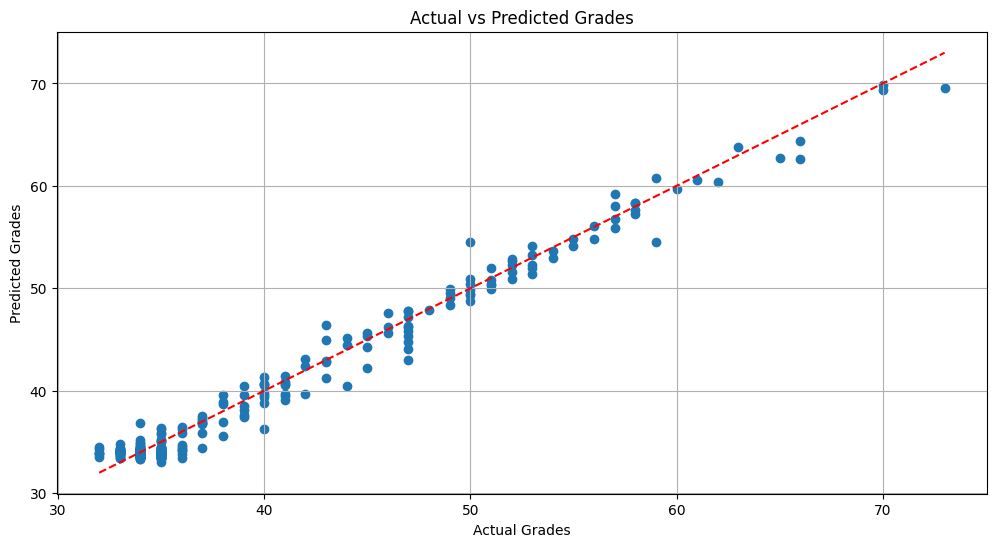

In [64]:
# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()

### Distribution of Errors

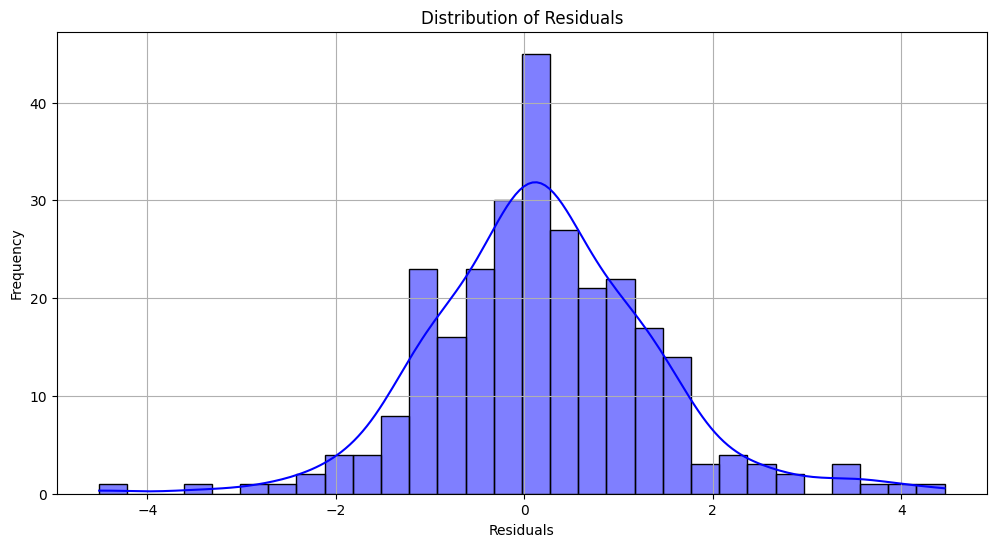

In [65]:
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('residuals.png')
plt.show()
